In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

4422102/4422102 [==============================] - 1s 0us/step


IndexError: invalid index to scalar variable.

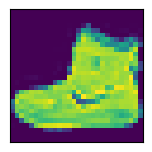

In [9]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10


1563/1563 [==============================] - 30s 17ms/step - loss: 1.5633 - accuracy: 0.4274 - val_loss: 1.3151 - val_accuracy: 0.5185
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2022 - accuracy: 0.5715 - val_loss: 1.1271 - val_accuracy: 0.6000
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0465 - accuracy: 0.6298 - val_loss: 1.0179 - val_accuracy: 0.6438
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9543 - accuracy: 0.6663 - val_loss: 1.0202 - val_accuracy: 0.6400
Epoch 5/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8862 - accuracy: 0.6900 - val_loss: 0.9449 - val_accuracy: 0.6670
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8221 - accuracy: 0.7130 - val_loss: 1.0153 - val_accuracy: 0.6535
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7719 - accuracy: 0.7294 - val_loss: 0.922

313/313 - 2s - loss: 0.8817 - accuracy: 0.7057 - 2s/epoch - 5ms/step


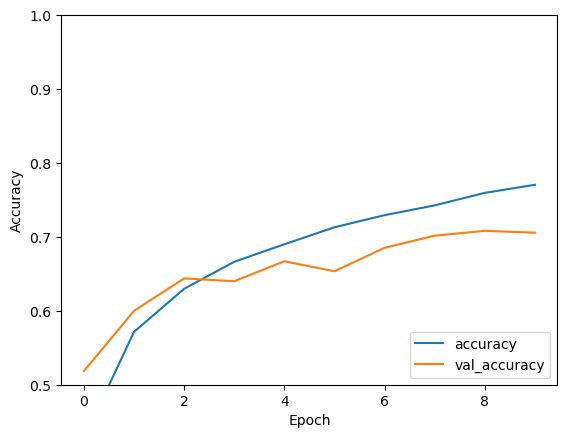

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)